<a href="https://colab.research.google.com/github/seher13/Nba/blob/main/NBA_stats_2021_22_Web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
data = requests.get(url).text

In [4]:
soup = BeautifulSoup(data, 'html5lib')

In [5]:
tables = soup.find_all('table')

In [6]:
len(tables)

1

In [7]:
df = pd.read_html(str(tables))[0]

In [8]:
df.iloc[:30,:]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,38,22,24.7,3.2,7.7,.418,0.3,1.2,.239,2.9,6.5,.452,.437,0.9,1.7,.556,2.3,5.1,7.3,1.2,0.6,0.6,1.0,2.1,7.7
1,2,Steven Adams,C,28,MEM,48,47,25.9,2.5,4.9,.517,0.0,0.0,NaN,2.5,4.9,.517,.517,1.5,2.7,.578,4.3,5.0,9.4,3.0,1.0,0.6,1.6,1.7,6.6
2,3,Bam Adebayo,C,24,MIA,25,25,33.4,6.6,12.9,.514,0.0,0.0,.000,6.6,12.9,.516,.514,4.6,6.0,.765,2.7,7.4,10.1,3.6,1.4,0.6,3.1,3.2,17.8
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4
5,6,Nickeil Alexander-Walker,SG,23,NOP,46,19,27.0,4.8,13.0,.371,2.0,6.2,.314,2.8,6.7,.424,.446,1.4,2.0,.733,0.8,2.6,3.4,2.8,0.8,0.3,1.6,1.8,13.0
6,7,Grayson Allen,SG,26,MIL,42,41,28.2,4.1,9.6,.424,2.6,6.7,.391,1.5,2.9,.500,.561,1.1,1.3,.868,0.5,3.0,3.5,1.4,0.9,0.4,0.6,1.5,11.9
7,8,Jarrett Allen,C,23,CLE,41,41,32.7,6.6,9.6,.689,0.0,0.2,.125,6.6,9.4,.701,.690,2.9,4.2,.688,3.4,7.5,11.0,1.9,0.8,1.4,1.9,1.9,16.1
8,9,Jose Alvarado,PG,23,NOP,22,1,11.2,1.5,3.9,.395,0.5,1.6,.314,1.0,2.3,.451,.459,0.5,0.9,.632,0.4,0.8,1.2,1.7,1.2,0.1,0.2,1.3,4.1
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,.316,0.5,2.5,.200,0.5,0.7,.750,.395,1.0,1.2,.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [9]:
df2 = df[~df.Pos.str.contains('Pos')]

In [10]:
df2.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,38,22,24.7,3.2,7.7,.418,0.3,1.2,.239,2.9,6.5,.452,.437,0.9,1.7,.556,2.3,5.1,7.3,1.2,0.6,0.6,1.0,2.1,7.7
1,2,Steven Adams,C,28,MEM,48,47,25.9,2.5,4.9,.517,0.0,0.0,NaN,2.5,4.9,.517,.517,1.5,2.7,.578,4.3,5.0,9.4,3.0,1.0,0.6,1.6,1.7,6.6
2,3,Bam Adebayo,C,24,MIA,25,25,33.4,6.6,12.9,.514,0.0,0.0,.000,6.6,12.9,.516,.514,4.6,6.0,.765,2.7,7.4,10.1,3.6,1.4,0.6,3.1,3.2,17.8
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4
5,6,Nickeil Alexander-Walker,SG,23,NOP,46,19,27.0,4.8,13.0,.371,2.0,6.2,.314,2.8,6.7,.424,.446,1.4,2.0,.733,0.8,2.6,3.4,2.8,0.8,0.3,1.6,1.8,13.0
6,7,Grayson Allen,SG,26,MIL,42,41,28.2,4.1,9.6,.424,2.6,6.7,.391,1.5,2.9,.500,.561,1.1,1.3,.868,0.5,3.0,3.5,1.4,0.9,0.4,0.6,1.5,11.9
7,8,Jarrett Allen,C,23,CLE,41,41,32.7,6.6,9.6,.689,0.0,0.2,.125,6.6,9.4,.701,.690,2.9,4.2,.688,3.4,7.5,11.0,1.9,0.8,1.4,1.9,1.9,16.1
8,9,Jose Alvarado,PG,23,NOP,22,1,11.2,1.5,3.9,.395,0.5,1.6,.314,1.0,2.3,.451,.459,0.5,0.9,.632,0.4,0.8,1.2,1.7,1.2,0.1,0.2,1.3,4.1
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,.316,0.5,2.5,.200,0.5,0.7,.750,.395,1.0,1.2,.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [11]:
df3 = df2.set_index('Rk')

In [12]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,38,22,24.7,3.2,7.7,.418,0.3,1.2,.239,2.9,6.5,.452,.437,0.9,1.7,.556,2.3,5.1,7.3,1.2,0.6,0.6,1.0,2.1,7.7
2,Steven Adams,C,28,MEM,48,47,25.9,2.5,4.9,.517,0.0,0.0,NaN,2.5,4.9,.517,.517,1.5,2.7,.578,4.3,5.0,9.4,3.0,1.0,0.6,1.6,1.7,6.6
3,Bam Adebayo,C,24,MIA,25,25,33.4,6.6,12.9,.514,0.0,0.0,.000,6.6,12.9,.516,.514,4.6,6.0,.765,2.7,7.4,10.1,3.6,1.4,0.6,3.1,3.2,17.8
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 1 to 590
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  649 non-null    object
 1   Pos     649 non-null    object
 2   Age     649 non-null    object
 3   Tm      649 non-null    object
 4   G       649 non-null    object
 5   GS      649 non-null    object
 6   MP      649 non-null    object
 7   FG      649 non-null    object
 8   FGA     649 non-null    object
 9   FG%     635 non-null    object
 10  3P      649 non-null    object
 11  3PA     649 non-null    object
 12  3P%     584 non-null    object
 13  2P      649 non-null    object
 14  2PA     649 non-null    object
 15  2P%     621 non-null    object
 16  eFG%    635 non-null    object
 17  FT      649 non-null    object
 18  FTA     649 non-null    object
 19  FT%     555 non-null    object
 20  ORB     649 non-null    object
 21  DRB     649 non-null    object
 22  TRB     649 non-null    object


In [14]:
seznam = np.arange(df3.shape[1])

In [15]:
seznam2 = np.delete(seznam, [0,1,3])

In [16]:
seznam2

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28])

In [17]:
seznam3 = df3.columns[seznam2]

In [18]:
for heading in seznam3:
  df3[heading] = pd.to_numeric(df3[heading], errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 1 to 590
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  649 non-null    object 
 1   Pos     649 non-null    object 
 2   Age     649 non-null    int64  
 3   Tm      649 non-null    object 
 4   G       649 non-null    int64  
 5   GS      649 non-null    int64  
 6   MP      649 non-null    float64
 7   FG      649 non-null    float64
 8   FGA     649 non-null    float64
 9   FG%     635 non-null    float64
 10  3P      649 non-null    float64
 11  3PA     649 non-null    float64
 12  3P%     584 non-null    float64
 13  2P      649 non-null    float64
 14  2PA     649 non-null    float64
 15  2P%     621 non-null    float64
 16  eFG%    635 non-null    float64
 17  FT      649 non-null    float64
 18  FTA     649 non-null    float64
 19  FT%     555 non-null    float64
 20  ORB     649 non-null    float64
 21  DRB     649 non-null    float64
 22  TRB    

In [19]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,38,22,24.7,3.2,7.7,0.418,0.3,1.2,0.239,2.9,6.5,0.452,0.437,0.9,1.7,0.556,2.3,5.1,7.3,1.2,0.6,0.6,1.0,2.1,7.7
2,Steven Adams,C,28,MEM,48,47,25.9,2.5,4.9,0.517,0.0,0.0,NaN,2.5,4.9,0.517,0.517,1.5,2.7,0.578,4.3,5.0,9.4,3.0,1.0,0.6,1.6,1.7,6.6
3,Bam Adebayo,C,24,MIA,25,25,33.4,6.6,12.9,0.514,0.0,0.0,0.000,6.6,12.9,0.516,0.514,4.6,6.0,0.765,2.7,7.4,10.1,3.6,1.4,0.6,3.1,3.2,17.8
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,2.1,0.569,0.402,0.4,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4


In [20]:
df3.sort_values('PTS', ascending=False).head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3
157,Joel Embiid,C,27,PHI,38,38,32.9,9.4,18.9,0.499,1.3,3.4,0.366,8.2,15.4,0.528,0.532,9.0,11.1,0.811,2.0,8.7,10.8,4.4,0.9,1.4,3.0,2.6,29.1
266,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1
12,Giannis Antetokounmpo,PF,27,MIL,41,41,32.7,9.9,18.6,0.534,1.1,3.9,0.285,8.8,14.7,0.599,0.563,7.9,10.9,0.721,1.8,9.4,11.3,5.9,1.0,1.4,3.6,3.3,28.8
587,Trae Young,PG,23,ATL,44,44,34.5,9.2,20.5,0.450,2.9,7.8,0.375,6.3,12.8,0.495,0.520,6.2,6.9,0.901,0.7,3.4,4.0,9.2,1.1,0.1,4.2,1.6,27.5
131,DeMar DeRozan,PF,32,CHI,44,44,34.9,9.6,19.2,0.499,0.6,1.8,0.338,9.0,17.4,0.516,0.515,6.7,7.8,0.858,0.8,4.2,5.0,4.9,0.8,0.3,2.2,2.2,26.5
282,Nikola Jokić,C,26,DEN,43,43,33.2,10.1,17.7,0.571,1.6,4.3,0.375,8.5,13.4,0.634,0.616,4.4,5.5,0.809,2.8,11.0,13.8,7.7,1.4,0.7,3.5,2.6,26.2
514,Jayson Tatum,SF,23,BOS,47,47,36.6,9.1,21.1,0.431,2.8,8.5,0.328,6.3,12.7,0.499,0.496,5.2,6.1,0.847,1.2,7.3,8.4,4.0,1.0,0.8,3.0,2.5,26.2
381,Ja Morant,PG,22,MEM,39,39,33.1,9.7,19.9,0.490,1.6,4.5,0.364,8.1,15.4,0.528,0.532,4.9,6.5,0.766,1.5,4.5,6.0,6.8,1.3,0.4,3.3,1.4,26.1


In [21]:
df3['EFF'] = df3['PTS'] +  df3['TRB'] + df3['AST'] + df3['STL'] + df3['BLK'] - df3['TOV']

In [22]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,38,22,24.7,3.2,7.7,0.418,0.3,1.2,0.239,2.9,6.5,0.452,0.437,0.9,1.7,0.556,2.3,5.1,7.3,1.2,0.6,0.6,1.0,2.1,7.7,16.4
2,Steven Adams,C,28,MEM,48,47,25.9,2.5,4.9,0.517,0.0,0.0,NaN,2.5,4.9,0.517,0.517,1.5,2.7,0.578,4.3,5.0,9.4,3.0,1.0,0.6,1.6,1.7,6.6,19.0
3,Bam Adebayo,C,24,MIA,25,25,33.4,6.6,12.9,0.514,0.0,0.0,0.000,6.6,12.9,0.516,0.514,4.6,6.0,0.765,2.7,7.4,10.1,3.6,1.4,0.6,3.1,3.2,17.8,30.4
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,2.1,0.569,0.402,0.4,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3,6.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,20.5


In [26]:
top10 = df3.sort_values('EFF', ascending=False).head(10)

In [36]:
top10 = top10.reset_index()
top10 = top10.iloc[:,2:]
top10

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
0,Nikola Jokić,C,26,DEN,43,43,33.2,10.1,17.7,0.571,1.6,4.3,0.375,8.5,13.4,0.634,0.616,4.4,5.5,0.809,2.8,11.0,13.8,7.7,1.4,0.7,3.5,2.6,26.2,46.3
1,Giannis Antetokounmpo,PF,27,MIL,41,41,32.7,9.9,18.6,0.534,1.1,3.9,0.285,8.8,14.7,0.599,0.563,7.9,10.9,0.721,1.8,9.4,11.3,5.9,1.0,1.4,3.6,3.3,28.8,44.8
2,Joel Embiid,C,27,PHI,38,38,32.9,9.4,18.9,0.499,1.3,3.4,0.366,8.2,15.4,0.528,0.532,9.0,11.1,0.811,2.0,8.7,10.8,4.4,0.9,1.4,3.0,2.6,29.1,43.6
3,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1,42.7
4,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3,41.2
5,Luka Dončić,PG,22,DAL,35,35,34.9,9.1,20.6,0.439,2.4,7.9,0.304,6.7,12.7,0.522,0.497,4.9,6.6,0.739,0.8,7.9,8.8,8.8,1.2,0.5,4.4,2.3,25.4,40.3
6,James Harden,PG,32,BRK,42,42,37.0,6.8,16.1,0.420,2.4,7.0,0.337,4.4,9.1,0.484,0.493,7.1,8.1,0.871,1.0,7.1,8.1,10.1,1.3,0.7,4.8,2.4,23.0,38.4
7,Trae Young,PG,23,ATL,44,44,34.5,9.2,20.5,0.450,2.9,7.8,0.375,6.3,12.8,0.495,0.520,6.2,6.9,0.901,0.7,3.4,4.0,9.2,1.1,0.1,4.2,1.6,27.5,37.7
8,Jayson Tatum,SF,23,BOS,47,47,36.6,9.1,21.1,0.431,2.8,8.5,0.328,6.3,12.7,0.499,0.496,5.2,6.1,0.847,1.2,7.3,8.4,4.0,1.0,0.8,3.0,2.5,26.2,37.4
9,Ja Morant,PG,22,MEM,39,39,33.1,9.7,19.9,0.490,1.6,4.5,0.364,8.1,15.4,0.528,0.532,4.9,6.5,0.766,1.5,4.5,6.0,6.8,1.3,0.4,3.3,1.4,26.1,37.3


Text(0, 0.5, 'Blocks')

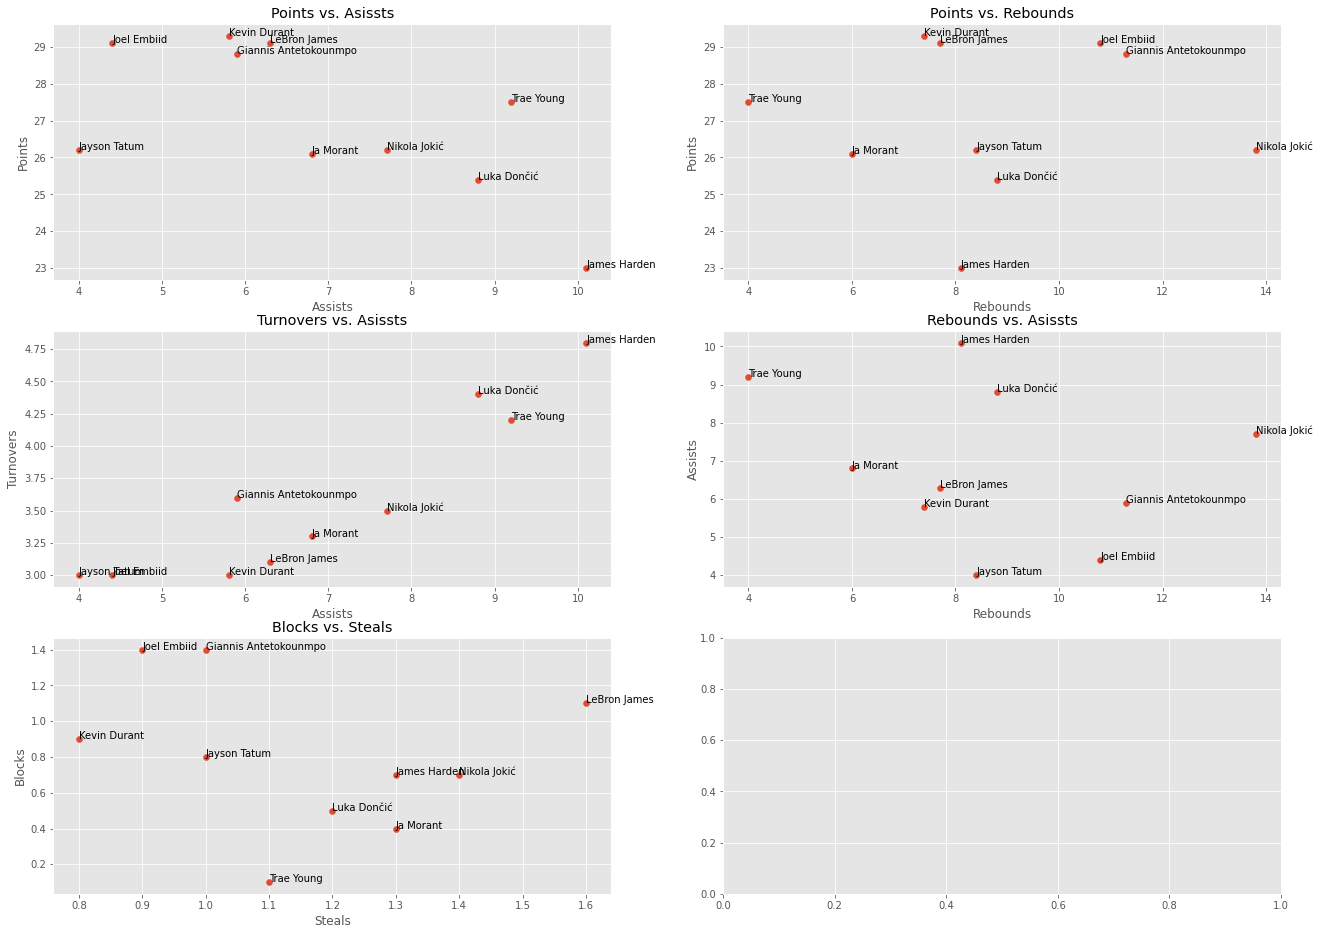

In [64]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.scatter(top10['AST'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(top10['TRB'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(top10['AST'], top10['TOV'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(top10['TRB'], top10['AST'])
for i, txt in enumerate(top10['Player']):
  ax4.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(top10['STL'], top10['BLK'])
for i, txt in enumerate(top10['Player']):
  ax5.annotate(txt, (top10.loc[i,'STL'], top10.loc[i,'BLK']))
ax5.set_title('Blocks vs. Steals')
ax5.set_xlabel('Steals')
ax5.set_ylabel('Blocks')

In [31]:
enumerate(top10['Player'])

In [37]:
top10['Player']

0             Nikola Jokić
1    Giannis Antetokounmpo
2              Joel Embiid
3             LeBron James
4             Kevin Durant
5              Luka Dončić
6             James Harden
7               Trae Young
8             Jayson Tatum
9                Ja Morant
Name: Player, dtype: object

In [ ]:
for i, in np.arange(9):
  ax1.annotate(top10['Player'], (top10['AST'], top10['PTS'])

In [41]:
top10.loc[0,'AST']

7.7

In [44]:
n = ['a', 'b', 'c']
n

['a', 'b', 'c']

In [48]:
print(list(enumerate(n)))

[(0, 'a'), (1, 'b'), (2, 'c')]
